In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [30]:
from thinning import sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel_vectorised, constant_background, plot_counting_process, exp_kernel
from mle import log_likelihood, optimise_params, optimise_params_general

In [10]:
test_seeds = [42, 123, 99, 24]

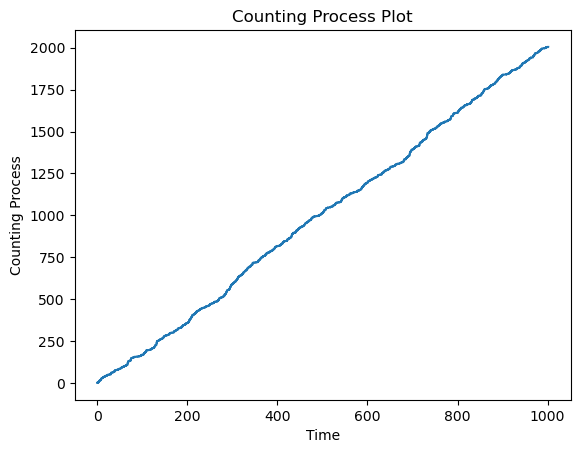

2005


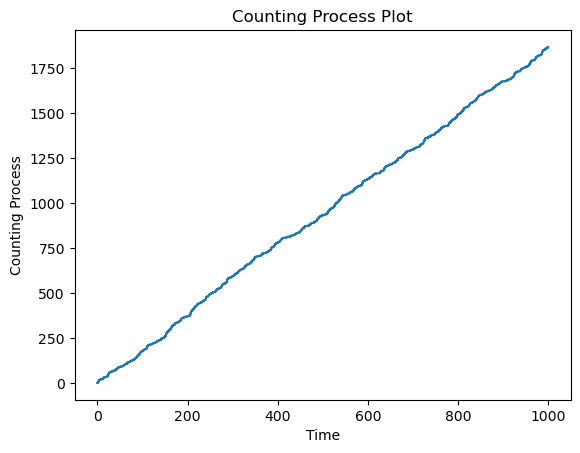

1869


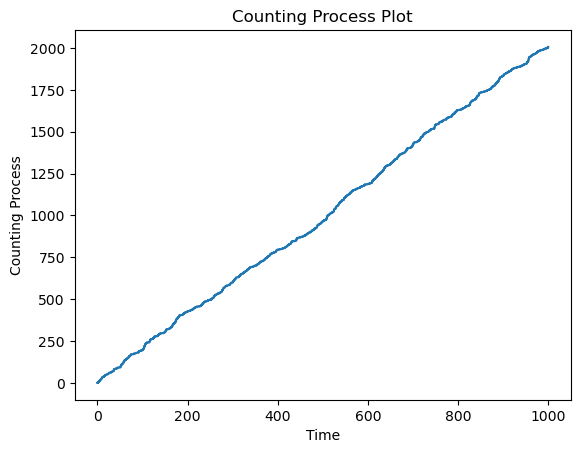

2006


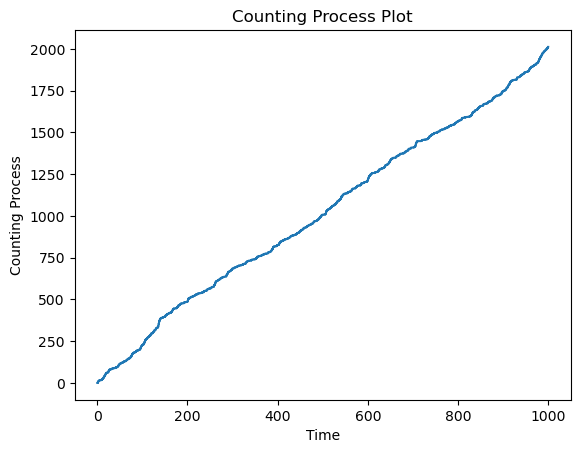

2012


In [59]:
for seed in test_seeds:
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(1000, constant_background, exp_kernel_vectorised, seed)
    plot_counting_process(hawkes_realisation)

    print(len(hawkes_realisation))

In [21]:
hawkes_realisation1 = sample_hawkes_process_thinning_true_vectorised(100, constant_background, exp_kernel_vectorised, seed=123)

In [22]:
hawkes_realisation1

[0.3822098256676933,
 1.1384564675373565,
 1.9846689254341163,
 2.0740095646129193,
 2.2947376287221135,
 2.353279008331111,
 2.427183041093687,
 2.443464466378184,
 2.4841426561717586,
 2.7216360413419376,
 2.855556487873982,
 3.1795037282575294,
 3.358372089790082,
 3.3783826045731855,
 3.395293957543577,
 3.7285399995337807,
 3.7783231502925427,
 4.009345625485148,
 6.565786895629992,
 8.660410926265818,
 9.007604340034257,
 9.828526364540249,
 12.337687433105781,
 12.612447356971039,
 12.682234276790666,
 13.772820002490628,
 14.18103768204654,
 14.476440882275146,
 14.495779404194264,
 14.686172739686983,
 14.915144072600677,
 15.894774484499045,
 16.246540844248663,
 20.617584935658883,
 21.251211378142038,
 21.298476226740302,
 21.36420965675408,
 21.472611725420606,
 21.9301108924471,
 23.47664711914313,
 23.75260926509793,
 23.81042653152507,
 24.105579543468398,
 24.12681899452284,
 24.214489989507694,
 24.27798354021739,
 24.54467633793348,
 24.764332362909855,
 24.879146833

In [23]:
hawkes_realisation2 = sample_hawkes_process_thinning_true_vectorised(1000, constant_background, exp_kernel_vectorised, seed=123)

In [24]:
hawkes_realisation2

[0.3822098256676933,
 1.1384564675373565,
 1.9846689254341163,
 2.0740095646129193,
 2.2947376287221135,
 2.353279008331111,
 2.427183041093687,
 2.443464466378184,
 2.4841426561717586,
 2.7216360413419376,
 2.855556487873982,
 3.1795037282575294,
 3.358372089790082,
 3.3783826045731855,
 3.395293957543577,
 3.7285399995337807,
 3.7783231502925427,
 4.009345625485148,
 6.565786895629992,
 8.660410926265818,
 9.007604340034257,
 9.828526364540249,
 12.337687433105781,
 12.612447356971039,
 12.682234276790666,
 13.772820002490628,
 14.18103768204654,
 14.476440882275146,
 14.495779404194264,
 14.686172739686983,
 14.915144072600677,
 15.894774484499045,
 16.246540844248663,
 20.617584935658883,
 21.251211378142038,
 21.298476226740302,
 21.36420965675408,
 21.472611725420606,
 21.9301108924471,
 23.47664711914313,
 23.75260926509793,
 23.81042653152507,
 24.105579543468398,
 24.12681899452284,
 24.214489989507694,
 24.27798354021739,
 24.54467633793348,
 24.764332362909855,
 24.879146833

In [28]:
np.allclose(hawkes_realisation1, hawkes_realisation2[:178])

True

Changing T_max doesn't change the output for a fixed seed (apart from how long it keeps sampling events for).

Changing kernel or background would change output if there are functional differences. But if it is refactoring of same function it should work the same. Fixing the seed fixes the sequence of Uniform r.v.s that are 'explored' by the rng.

WARNING!! The seed_sequence must be initialised fresh each time you run. This is very important.

SeedSequence(
    entropy=42,
    spawn_key=(0,),
)


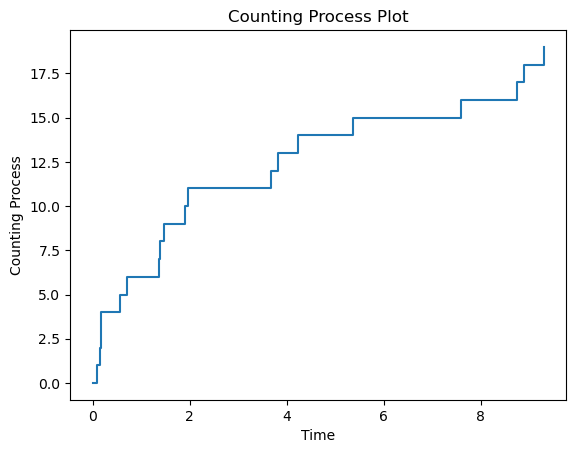

SeedSequence(
    entropy=42,
    spawn_key=(1,),
)


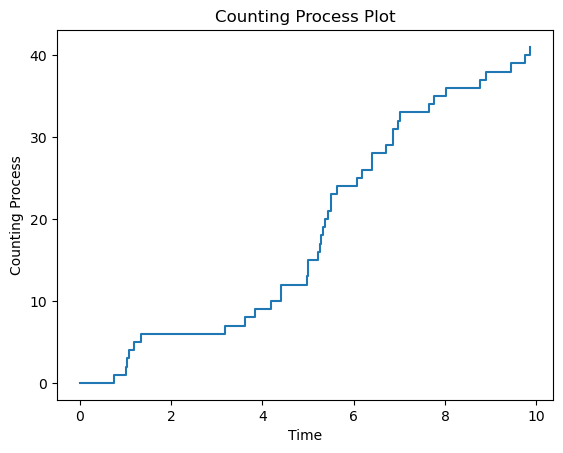

SeedSequence(
    entropy=42,
    spawn_key=(2,),
)


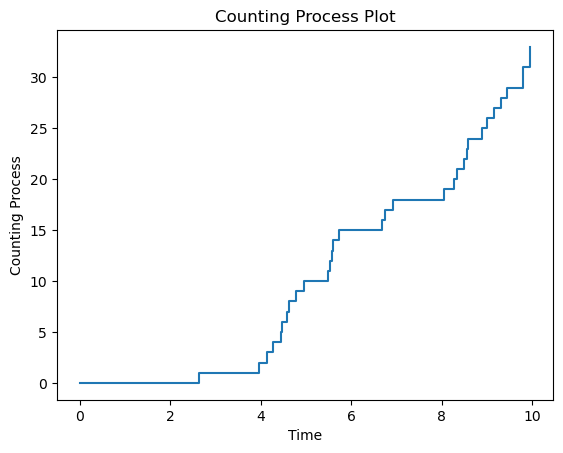

SeedSequence(
    entropy=42,
    spawn_key=(3,),
)


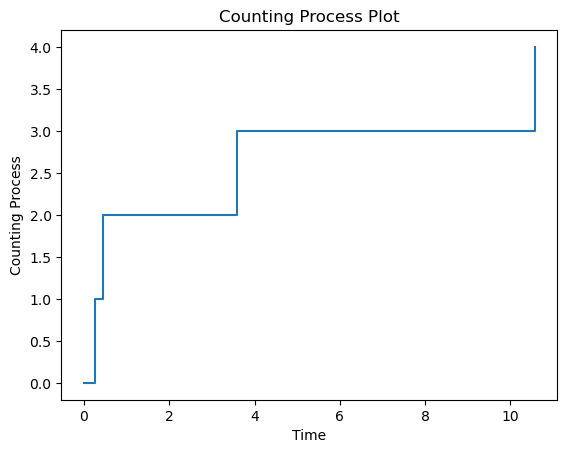

SeedSequence(
    entropy=42,
    spawn_key=(4,),
)


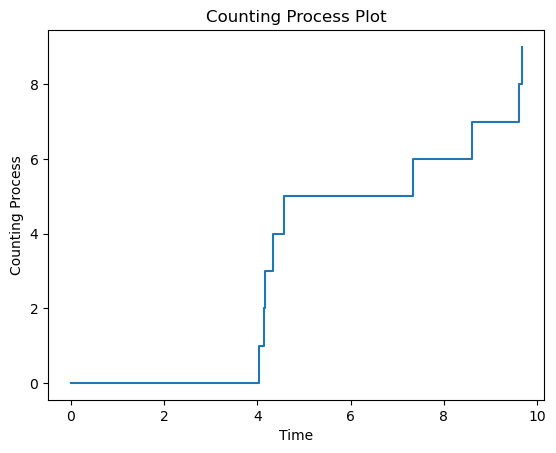

SeedSequence(
    entropy=42,
    spawn_key=(5,),
)


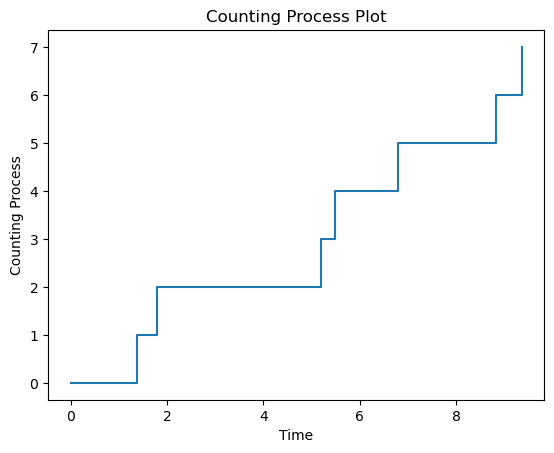

SeedSequence(
    entropy=42,
    spawn_key=(6,),
)


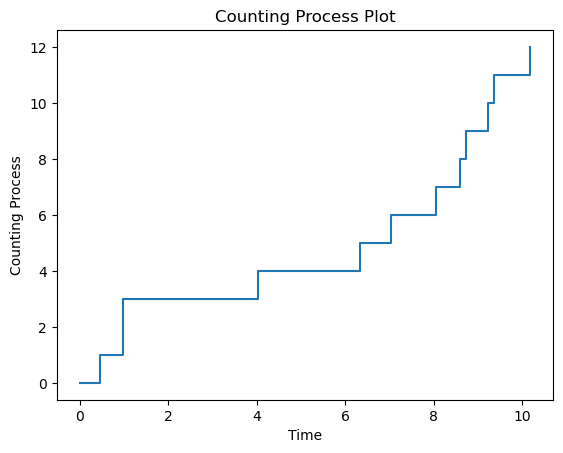

SeedSequence(
    entropy=42,
    spawn_key=(7,),
)


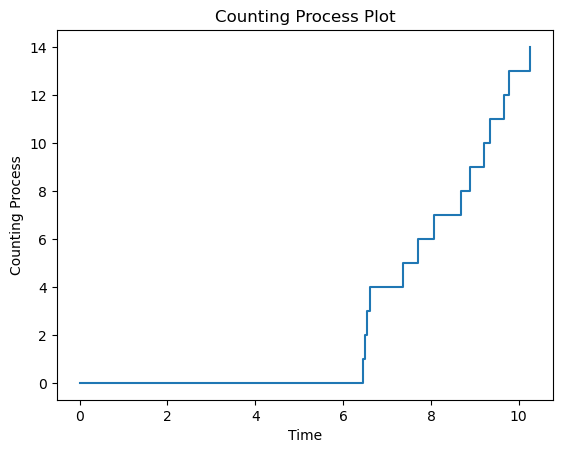

SeedSequence(
    entropy=42,
    spawn_key=(8,),
)


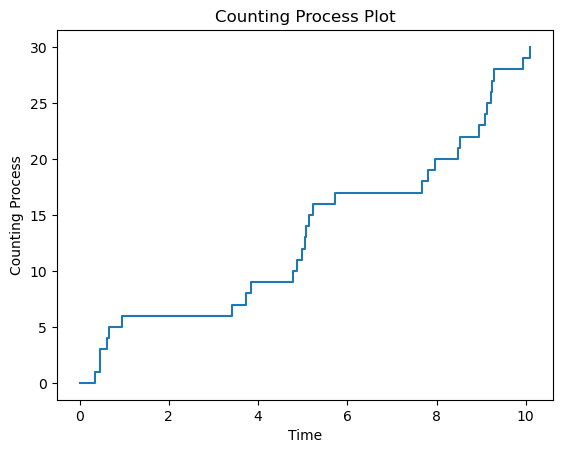

SeedSequence(
    entropy=42,
    spawn_key=(9,),
)


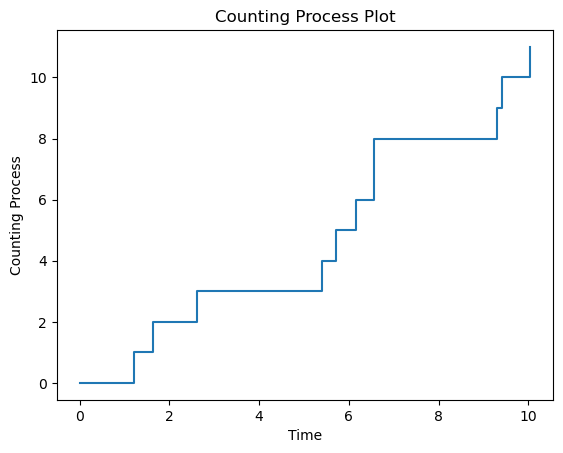

In [72]:
master_seed = 42
seed_seq_master = np.random.SeedSequence(master_seed)
num_samples = 10
lengths = []

for i in range(num_samples):

    child_seed = seed_seq_master.spawn(1)[0]

    print(child_seed)

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(10, constant_background, exp_kernel_vectorised, seed=child_seed)
    lengths.append(len(hawkes_realisation))

    plot_counting_process(hawkes_realisation)

In [71]:
print(lengths)

[19, 41, 33, 4, 9, 7, 12, 14, 30, 11]


Following is NumPy's best practice for getting seed to begin with. Save it after generating.

In [76]:
sq1 = np.random.SeedSequence()
sq1.entropy

103091295063972238195411423537625692528

Now we adapt the zero_kernel test code to be reproducible

In [78]:
def zero_kernel(t):

    return np.zeros_like(t)

In [81]:
max_T = 1000

master_seed = 42
seed_seq_master = np.random.SeedSequence(master_seed)

num_samples = 100
num_events = np.zeros(num_samples)
for i in range(num_samples):
    child_seed = seed_seq_master.spawn(1)[0]
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, zero_kernel, seed=child_seed)
    num_events[i] = len(hawkes_realisation)

    if i % 10 == 0:
        print(f'Iteration {i} complete', len(hawkes_realisation))

print(np.mean(num_events))

Iteration 0 complete 1023
Iteration 10 complete 1036
Iteration 20 complete 1007
Iteration 30 complete 1014
Iteration 40 complete 994
Iteration 50 complete 996
Iteration 60 complete 970
Iteration 70 complete 1006
Iteration 80 complete 1000
Iteration 90 complete 1002
1005.53


This produces same output for fixed master_seed. Yay!

In [83]:
max_T = 1000

master_seed = 235087235124
seed_seq_master = np.random.SeedSequence(master_seed)

num_samples = 100
num_events = np.zeros(num_samples)
for i in range(num_samples):
    child_seed = seed_seq_master.spawn(1)[0]
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, zero_kernel, seed=child_seed)
    num_events[i] = len(hawkes_realisation)

    if i % 10 == 0:
        print(f'Iteration {i} complete', len(hawkes_realisation))

print(np.mean(num_events))

Iteration 0 complete 980
Iteration 10 complete 958
Iteration 20 complete 1010
Iteration 30 complete 1049
Iteration 40 complete 979
Iteration 50 complete 1018
Iteration 60 complete 1054
Iteration 70 complete 1059
Iteration 80 complete 1005
Iteration 90 complete 1019
999.38
